# Change point detection

A change point in a time series refers to a specific instance where the statistical properties of the data significantly shift. These shifts can occur due to various reasons such as external influences, sudden shifts in underlying processes, or structural changes in the system being observed. Identifying change points is crucial for understanding the behavior of the underlying process and making informed decisions based on the observed data.

### Definition : 
Let {xₘ, xₘ₊₁, . . , xₙ} be a sequence of time series variables. Change point detection (CPD) can be defined as the problem of hypothesis testing between two alternatives, the null hypothesis H₀: “No change occurs” and the alternative hypothesis Hₐ: “A change occurs”:

1. **H₀:** ℙ(Xₘ = ⋯ = ℙ(Xₖ = ⋯ = ℙ(Xₙ.
2. **Hₐ:** There exists m < k* < n such that ℙ(Xₘ = ⋯ = ℙ(Xₖ* ≠ ℙ(Xₖ*₊₁ = ⋯ = ℙ(Xₙ), 

where ℙ(Xᵢ) is the probability density function of the sliding window start at point xᵢ and k* is a change point.


### Types of change points

Four types of change can be detected by the tool. Each image below shows the time series as a blue line chart with vertical orange lines at the change points. 

#### Mean shift
Detects shifts in the mean value of the analysis variable. The data values are assumed to follow a normal distribution with all time steps having the same standard deviation. The mean value is constant within each segment and changes to a new value at each change point. 

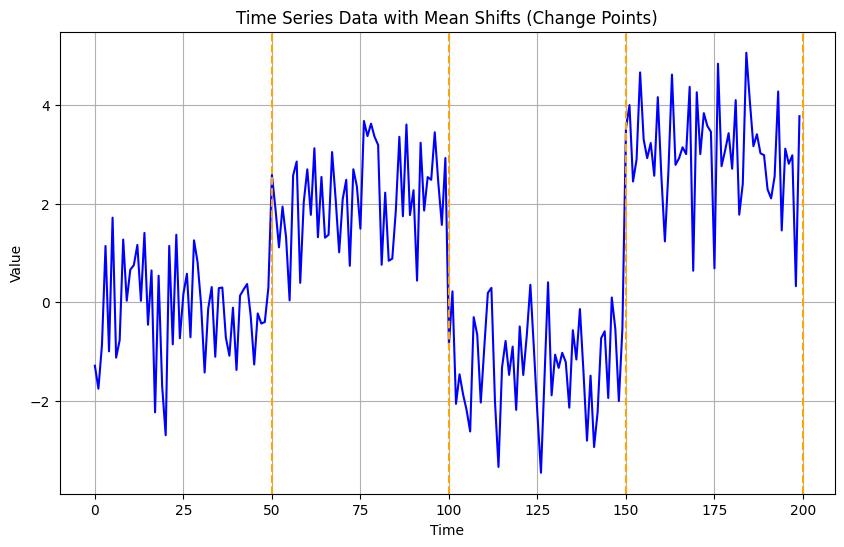

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
num_samples = 200
true_change_points_mean = [50, 100, 150, 200]  # Change points occur at these indices
mean_values = [0, 2, -1, 3]  # Mean values for each segment

# Generate time series data with mean shifts
data_mean = np.zeros(num_samples)
for i in range(len(true_change_points_mean)):
    start = 0 if i == 0 else true_change_points_mean[i-1]
    end = true_change_points_mean[i]
    data_mean[start:end] = np.random.normal(mean_values[i], 1, end - start)

# Plot the time series data with change points
plt.figure(figsize=(10, 6))
plt.plot(data_mean, color='blue')
for cp in true_change_points_mean:
    plt.axvline(x=cp, color='orange', linestyle='--')
plt.title('Time Series Data with Mean Shifts (Change Points)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()


#### Standard deviation
Detects changes in the standard deviation of the analysis variable. The data values are assumed to follow a normal distribution with all time steps having the same mean value. The standard deviation is constant within each segment and changes to a new value at each change point.

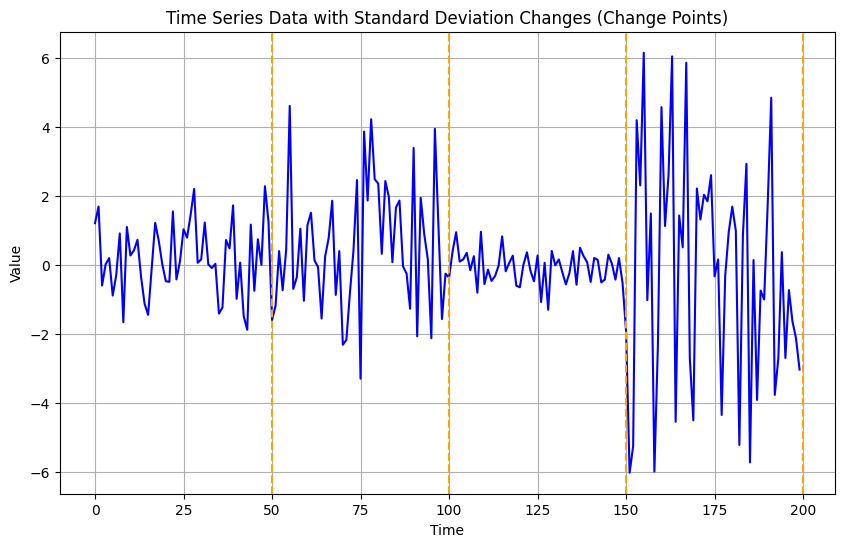

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
num_samples = 200
true_change_points_std = [50, 100, 150, 200]  # Change points occur at these indices
std_values = [1, 2, 0.5, 3]  # Standard deviation values for each segment
mean_value = 0  # Mean value for all segments

# Generate time series data with standard deviation changes
data_std = np.zeros(num_samples)
for i in range(len(true_change_points_std)):
    start = 0 if i == 0 else true_change_points_std[i-1]
    end = true_change_points_std[i]
    data_std[start:end] = np.random.normal(mean_value, std_values[i], end - start)

# Plot the time series data with change points
plt.figure(figsize=(10, 6))
plt.plot(data_std, color='blue')
for cp in true_change_points_std:
    plt.axvline(x=cp, color='orange', linestyle='--')
plt.title('Time Series Data with Standard Deviation Changes (Change Points)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

#### Change in periodicity 
(also called change in frequency) concerns time series with cyclic properties (e.g., a machine’s regime). Here, the change occurs when the frequency changes suddenly. Detection of this kind of change is usually done in the frequency domain, for example by using Fourier transform or wavelet transform. 

#### Change in pattern
 is more difficult to tackle than the previous ones. Such changes can occur, for example, in ECG signals. Ond one way to detect them is to use Wasserstein distances between empirical distributions (Shvetsov et al. 2020). At this point, we can see that change point detection is closely related to anomaly detection; the difference between the two tasks is sometimes fuzzy.


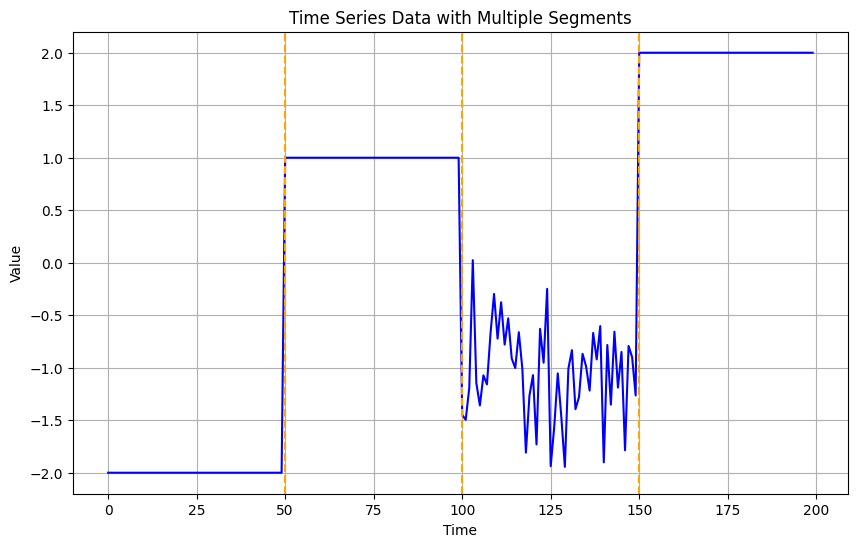

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
num_samples = 200
true_change_points_pt = [50, 100, 150]  # Change points indices
values = [-2, 1, 3, 2, 4, 6]  # Values for each segment
distributions = [(0, 1), (2, 1.5), (-1, 0.5), (3, 2)]  # Mean and std for normal distributions for each segment

# Generate synthetic data with multiple segments
data_pt = np.zeros(num_samples)
for i in range(len(true_change_points_pt) + 1):
    start = 0 if i == 0 else true_change_points_pt[i-1]
    end = num_samples if i == len(true_change_points_pt) else true_change_points_pt[i]
    if i != 2 :  # Even segments have fixed values
        data_pt[start:end] = values[i]
    else:  # Odd segments have normal distributions
        mean, std = distributions[i]
        data_pt[start:end] = np.random.normal(mean, std, end - start)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data_pt, color='blue')
for cp in true_change_points_pt:
    plt.axvline(x=cp, color='orange', linestyle='--')
plt.title('Time Series Data with Multiple Segments')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()


#### Change in trend

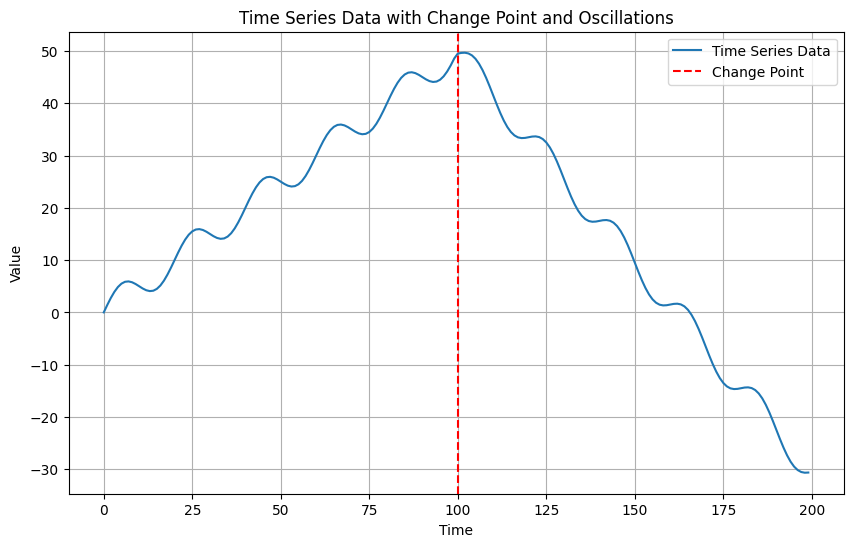

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_points = 200
change_point = 100
slope1 = 0.5  # slope before change point
slope2 = -0.8  # slope after change point
amplitude = 3.0  # Amplitude of oscillations
frequency = 0.05  # Frequency of oscillations

# Generate time series data
time = np.arange(num_points)
data_tr = np.zeros(num_points)

# Generate first trend
data_tr[:change_point] = slope1 * time[:change_point]

# Generate oscillations
oscillations = amplitude * np.sin(2 * np.pi * frequency * time)

# Generate second trend
data_tr[change_point:] = slope2 * (time[change_point:] - change_point) + data_tr[change_point - 1]

# Combine trends with oscillations
data_tr += oscillations

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time, data_tr, label='Time Series Data')
plt.axvline(x=change_point, color='r', linestyle='--', label='Change Point')
plt.title('Time Series Data with Change Point and Oscillations')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
def generate_normal_time_series(num, minl=50, maxl=1000):
    data = np.array([], dtype=np.float64)
    partition = np.random.randint(minl, maxl, num)
    for p in partition:
        mean = np.random.randn()*10
        var = np.random.randn()*1
        if var < 0:
            var = var * -1
        tdata = np.random.normal(mean, var, p)
        data = np.concatenate((data, tdata))
    return data

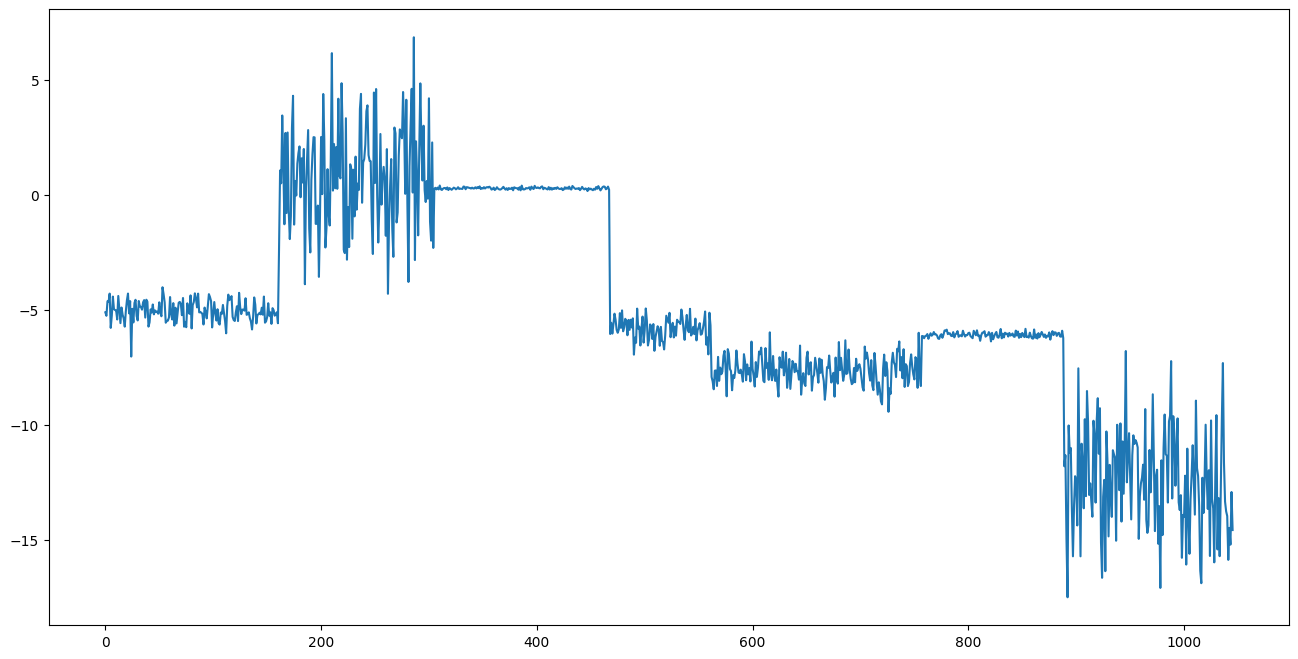

In [7]:
data = generate_normal_time_series(7, 50, 200)
fig, ax = plt.subplots(figsize=[16, 8])
ax.plot(data)

### Supervised and Unsupervised Algorithms for Change Point Detection:

The main difference between supervised and unsupervised algorithms for change point detection lies in the presence or absence of labeled data during the training phase.

#### Supervised Change Point Detection:

In supervised change point detection, the algorithm requires labeled data, meaning that each data point or segment is labeled with whether it belongs to a particular state (e.g., normal state or changed state). The algorithm learns patterns from this labeled data to detect change points.

- **Training Phase**: Supervised algorithms are trained on a dataset where each data point or segment is labeled as either belonging to a specific state or not.
  
- **Pros**:
  - **Accuracy**: With labeled data, supervised algorithms can achieve high accuracy in detecting change points.
  - **Interpretability**: The model's decision-making process can be easily interpreted since it learns from labeled examples.
  
- **Cons**:
  - **Dependency on Labels**: Requires labeled data for training, which may be costly or time-consuming to obtain.
  - **Limited Generalization**: May struggle with detecting changes that are not represented in the labeled training data.


#### Unsupervised Change Point Detection:

In unsupervised change point detection, the algorithm operates without labeled data. It detects change points solely based on the characteristics of the time series data itself, without any prior knowledge of when changes occurred.

- **Training Phase**: Unsupervised algorithms do not require labeled data during training. Instead, they analyze the data directly to identify patterns or deviations that indicate change points.
  
- **Pros**:
  - **Flexibility**: Unsupervised algorithms can detect changes without relying on labeled data, making them more adaptable to various datasets and scenarios.
  - **No Labeling Requirement**: Eliminates the need for labeled data, reducing the burden of data collection and annotation.
  
- **Cons**:
  - **Lower Precision**: Unsupervised algorithms may have lower precision compared to supervised methods since they do not have explicit labels to guide the learning process.
  - **Interpretability**: The decision-making process of unsupervised algorithms may be less interpretable compared to supervised methods, as they operate solely based on data characteristics.

In practice, supervised methods for change point detection may not be feasible when dealing with a large number of diverse time series datasets. Labeling each dataset for training would be time-consuming and impractical, making unsupervised methods more suitable for real-world applications where efficiency is crucial.


Unsupervised learning algorithms are typically used to discover patterns in unlabeled data. In the context of change point detection, such algorithms can be used to segment time series data, thus finding change points based on statistical features of the data. Unsupervised segmentation is attractive because it may handle a variety of different situations without requiring prior training for each situation.

Figure 4 provides an overview of unsupervised methods that have been used for change point detection. Early reported methods utilize likelihood ratio based on the observation that the probability density of two consecutive intervals are the same if they belong to the same state. Another traditional solution is subspace modeling, which represents a time series using state spaces and thus detects change points by predicting the state space parameters.

Probabilistic methods estimate probability distributions of the new interval based on the data that has been observed since the previous candidate change point. In contrast, kernel-based methods map observations onto a higher-dimensional feature space and detect change points by comparing the homogeneity of each subsequence.

The graph-based technique is a newly-introduced method which represents time series observations as a graph and applies statistical tests to detect change points based on this representation. Finally, clustering methods group time series data into their respective states and find changes by identifying differences between features of the states.


![Unsupervised Techniques](unsupervised_techniques_CPD.png)

### Likelihood Ratio

A typical statistical formulation of change-point detection is to analyze the probability distributions of data before and after a change point, and identify the candidate as a change point if the two distributions are significantly different. In these approaches, the logarithm of the likelihood ratio between two consecutive intervals in time-series data is monitored for detecting change points. This strategy requires two steps. First, the probability density of two consecutive intervals is calculated separately. Second, the ratio of these probability densities is computed.

#### CUSUM

The most familiar change point algorithm is cumulative sum, which accumulates deviations relative to a specified target of incoming measurements and indicates that a change point exists when the cumulative sum exceeds a specified threshold.


##### Given:
- Observations: $x_t$, where $t = 1, 2, \ldots, T$.
- Initial mean and standard deviation: $\mu_0$ and $\sigma_0$.

##### Steps:

1. **Sequential Updating of Parameters**:
   - Update the mean and standard deviation sequentially using the observed data:
     - $\hat{\mu}_t = \frac{1}{t} \sum_{i=1}^{t} x_i$
     - $\hat{\sigma}_t = \sqrt{\frac{1}{t} \sum_{i=1}^{t} (x_i - \hat{\mu}_t)^2}$

2. **Calculation of Deviations**:
   - Calculate the deviation $d_t$ of each observation from the estimated mean:
     - $d_t = |x_t - \hat{\mu}_t|$

3. **Cumulative Sum Calculation**:
   - Compute the CUSUM statistic $S_t$ as the cumulative sum of deviations:
     - $S_t = \sum_{i=1}^{t} d_i$

4. **Detection of Change Points**:
   - Compare the CUSUM statistic to a threshold $\lambda$ to detect change points:
     - If $S_t > \lambda$, a change point is detected at time $t$.

5. **Resetting the CUSUM Statistic**:
   - Once a change point is detected, reset the CUSUM statistic to zero or a small value.

6. **Choice of Threshold**:
   - The threshold $\lambda$ is chosen based on desired sensitivity and false alarm rate.


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def detect_change_points_cusum1(time_series, threshold=3, display=True):
    """
    Detect change points in a time series using the CUSUM algorithm.

    Parameters:
        time_series (array-like): The input time series data.
        threshold (float): The threshold for detecting change points.
        display (bool): Whether to display the results.

    Returns:
        detected_change_points (list): List of indices corresponding to detected change points.
    """
    n_points = len(time_series)
    cusum_pos = np.zeros(n_points)
    cusum_neg = np.zeros(n_points)

    detected_change_points = []

    for i in range(1, n_points):
        cusum_pos[i] = max(0, cusum_pos[i-1] + (time_series[i] - np.mean(time_series[:i+1])))
        cusum_neg[i] = max(0, cusum_neg[i-1] - (time_series[i] + np.mean(time_series[:i+1])))

        if cusum_pos[i] > threshold or cusum_neg[i] > threshold:
            detected_change_points.append(i)

    if display:
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Create subplots with two axes

        # Plot time series data
        axs[0].plot(time_series, label='Time Series Data')
        axs[0].scatter(detected_change_points, time_series[detected_change_points], color='r', label='Detected Change Points')
        axs[0].set_xlabel('Time')
        axs[0].set_ylabel('Value')
        axs[0].set_title('Time Series Data with Detected Change Points')
        axs[0].legend()
        axs[0].grid(True)

        # Plot cumulative sum
        axs[1].plot(cusum_pos, label='CUSUM+')
        axs[1].plot(cusum_neg, label='CUSUM-')

        axs[1].axhline(y=threshold, color='r', linestyle='--', label='Threshold')
        axs[1].scatter(detected_change_points, cusum_pos[detected_change_points], color='r', label='Detected Change Points')
        axs[1].set_xlabel('Time')
        axs[1].set_ylabel('CUSUM')
        axs[1].set_title('CUSUM Algorithm for Change Point Detection')
        axs[1].legend()
        axs[1].grid(True)

        plt.tight_layout()  # Adjust the layout to prevent overlap
        plt.show()

    return detected_change_points


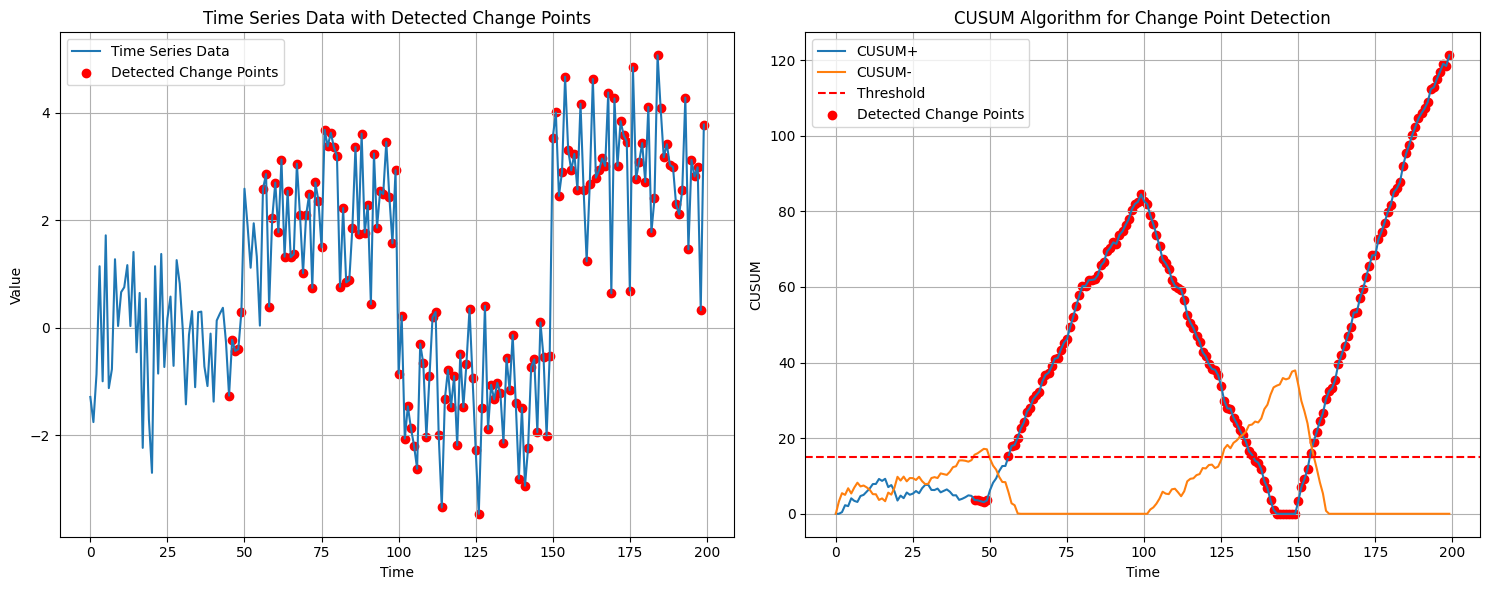

Detected Change Points: [45, 46, 47, 48, 49, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


In [9]:
# Detect change points using CUSUM algorithm
change_points = detect_change_points_cusum1(data_mean, threshold=15 )
print("Detected Change Points:", change_points)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def detect_change_points_cusum(time_series, true_change_points, threshold=3, display=True):
    """
    Detect change points in a time series using the CUSUM algorithm.

    Parameters:
        time_series (array-like): The input time series data.
        threshold (float): The threshold for detecting change points.
        display (bool): Whether to display the results.

    Returns:
        detected_change_points (list): List of indices corresponding to detected change points.
    """
    n_points = len(time_series)
    cusum = np.zeros(n_points)
    detected_change_points = [0]
    ts = time_series
    CP_detected = True
    while CP_detected:
        CP_detected=False
        for i in range(1, n_points):
            cusum[i] = max(0, cusum[i-1] + (ts[i] - np.mean(ts[:i+1])))
            if cusum[i] > threshold:
                detected_change_points.append(detected_change_points[-1] + i)
                ts = time_series[detected_change_points[-1] + i +1 :]
                n_points = len(ts)
                cusum = np.zeros(n_points)
                CP_detected = True
                break

    detected_change_points.pop(0)
        
    if display:
        plt.figure(figsize=(10, 6))
        plt.plot(time_series, label='Time Series Data')
        plt.scatter(detected_change_points, time_series[detected_change_points], color='r', label='Detected Change Points')

        # Add vertical lines for true change points
        
        if true_change_points:
            for point in true_change_points:
                plt.axvline(x=point, color='g', linestyle='--')

        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title('Time Series Data with Detected and True Change Points With CUSUM')
        plt.legend()
        plt.grid(True)
        plt.show()


    return detected_change_points



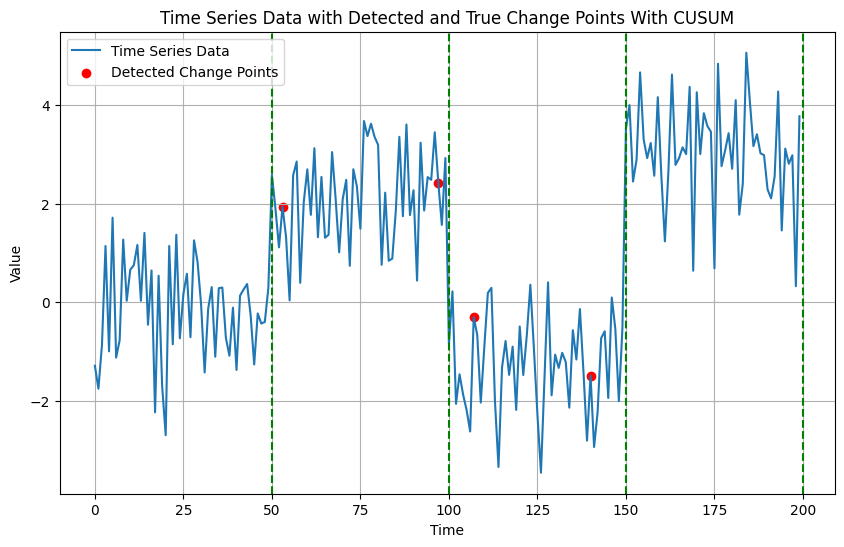

Detected Change Points: [53, 97, 107, 140]


In [11]:
# Detect change points using CUSUM algorithm
change_points = detect_change_points_cusum(data_mean, true_change_points_mean, threshold=11)
print("Detected Change Points:", change_points)

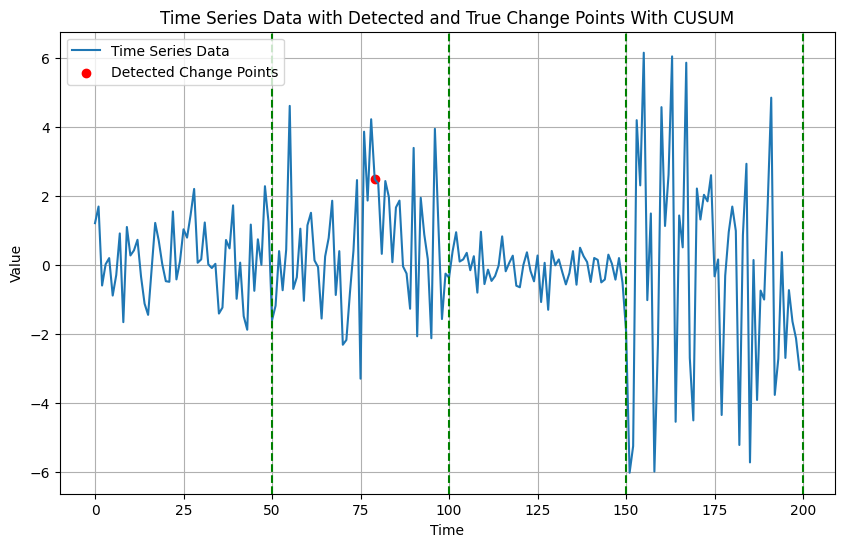

Detected Change Points: [79]


In [12]:
# Detect change points using CUSUM algorithm
change_points = detect_change_points_cusum(data_std, true_change_points_std, threshold=10, display=True)
print("Detected Change Points:", change_points)

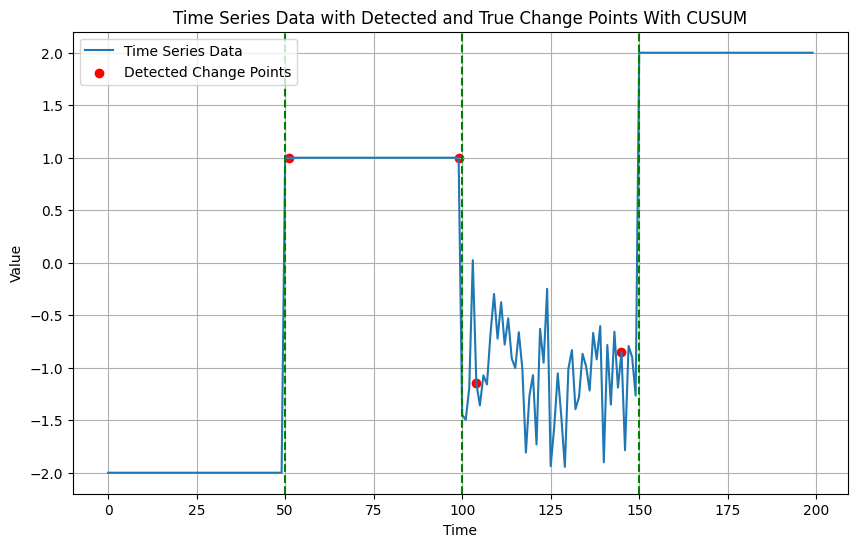

Detected Change Points: [51, 99, 104, 145]


In [13]:
# Detect change points using CUSUM algorithm
change_points = detect_change_points_cusum(data_pt, true_change_points_pt, threshold=5, display=True)
print("Detected Change Points:", change_points)

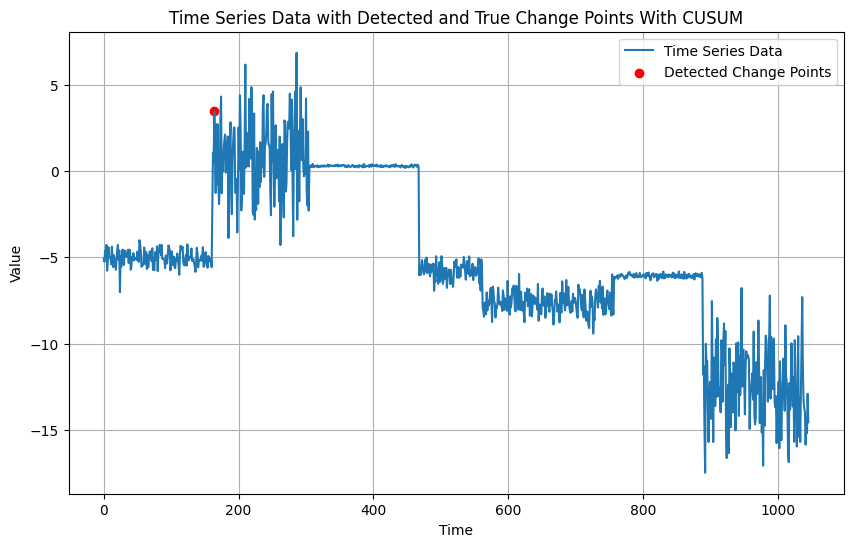

Detected Change Points: [164]


In [14]:
# Detect change points using CUSUM algorithm
change_points = detect_change_points_cusum(data, [], threshold=15, display=True)
print("Detected Change Points:", change_points)

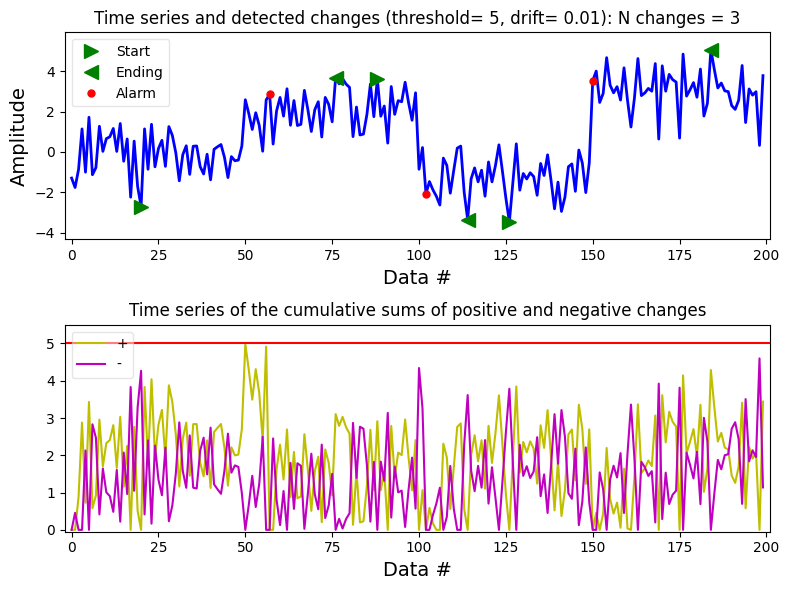

In [15]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


from detecta import detect_cusum
ta, tai, taf, amp = detect_cusum(data_mean, 5, 0.01, True, True)

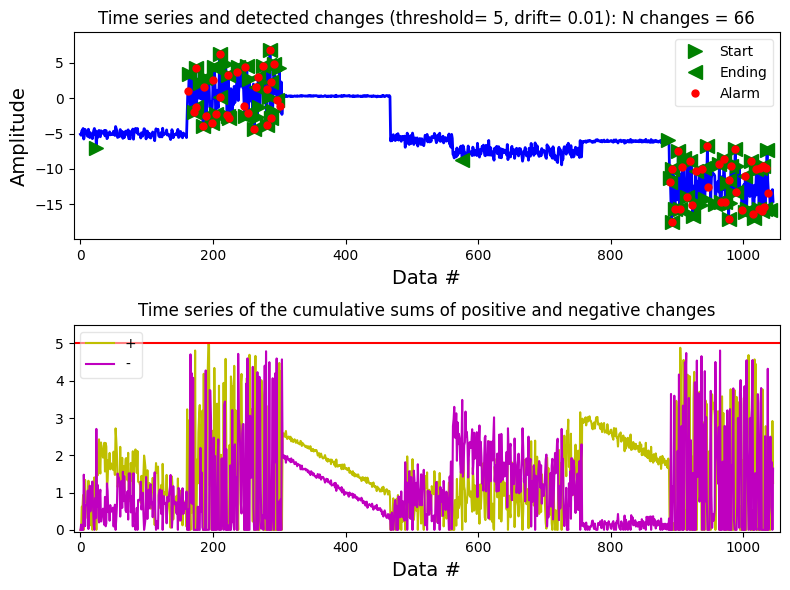

In [16]:
ta, tai, taf, amp = detect_cusum(data, 5, 0.01, True, True)

##### Limits of the Model:

1. **Sensitivity to Threshold Selection**: The choice of threshold can significantly impact the performance of the algorithm. A threshold that is too low may result in false positives (detecting changes when none exist), while a threshold that is too high may result in false negatives (failing to detect actual changes).

2. **Assumption of Stationarity**: The CUSUM algorithm assumes that the underlying process generating the time series data is stationary. If the process is non-stationary or exhibits complex patterns, the algorithm may not perform well.

3. **Single Mean Change Detection**: The algorithm is designed to detect a single change in mean. If the time series contains multiple changes or changes in variance, additional techniques may be needed to handle these scenarios.

4. **Computational Complexity**: Depending on the length of the time series and the chosen threshold, the computational complexity of the algorithm may become significant. For large datasets, the algorithm may require optimization or alternative approaches.

Overall, while the CUSUM algorithm provides a simple and intuitive method for detecting changes in means for time series data, its effectiveness depends on careful parameter selection and consideration of the underlying data characteristics. Additionally, it may not be suitable for all types of time series data, particularly those with non-stationary or complex patterns.


In [17]:
# # import packages
# # from kats.detectors.cusum_detection import CUSUMDetector
# tsd = TimeSeriesData(df_increase_decrease.loc[:,['time','increase']])
# detector = CUSUMDetector(tsd)
# change_points = detector.detector(change_directions=["increase"])

# detector.plot(change_points)
# plt.xticks(rotation=45)
# plt.show()

### Change Finder

The **Change Finder** is another commonly used method which reduces the problem of change point detection into time series-based outlier detection. This method fits an Auto Regression (AR) model onto the data to represent the statistical behavior of the time series and updates its parameter estimates incrementally so that the effect of past examples is gradually discounted. Considering time series $x_t$, we can model the time series using an AR model of the $k$th order by:

$$
x_t = \sum_{i=1}^{k} \omega_i x_{t-i} + \epsilon_t
$$

where $x_{t-i}$ are previous observations, $\omega = (\omega_1, \ldots, \omega_k) \in \mathbb{R}^k$ are constants, and $\epsilon$ is a normal random variable generated according to a Gaussian distribution like white noise. By updating model parameters, the probability density function at time $t$ is calculated, and we have a sequence of probability densities $\{ p_t : t = 1, 2, \ldots \}$. Next, an auxiliary time-series $y_t$ is generated by giving a score to each data point. This score function is defined as the average of the log-likelihood, $\text{Score}(y_t) = - \log p_{t-1}(y_t)$, or statistical deviation, $\text{Score}(y_t) = d(p_{t-1}, p_t)$, where $d(*,*)$ is provided by any of a number of distance functions including variation distance, Hellinger distance, or quadratic distance. The new time series data represents the difference between each pair of consecutive time series intervals. In order to detect change points, we need to know if there are abrupt changes between two consecutive differences. To do this, one more AR model is fit to the difference-based time series, and a new sequence of probability density functions $\{ q_t : t = 1, 2, \ldots \}$ is constructed. The change-point score is defined using the aforementioned score function. A higher score indicates a higher possibility of being a change point.


#### Principles and Operations of the Change Finder Algorithm

The Change Finder algorithm utilizes several key principles and operations to effectively detect changes in time series data. Here's a breakdown of the utility of each operation:

1. **Auto Regression (AR) Model Fitting**:
   - **Utility**: The AR model captures temporal dependencies and underlying patterns in the time series data. By representing each data point as a linear combination of its past values, the AR model provides a compact and interpretable representation of the data's statistical behavior.

2. **Incremental Parameter Updates**:
   - **Utility**: Incremental updates ensure that the model remains adaptive to changes in the underlying data distribution. By incorporating new observations while gradually discounting the influence of past data, the model can track evolving patterns and adapt to shifting trends in the time series.

3. **Generation of Probability Density Functions (PDFs)**:
   - **Utility**: PDFs characterize the distribution of the time series data over time. By calculating PDFs based on the AR model parameters, the algorithm quantifies the likelihood of observing specific values at each time point. This provides valuable insight into the statistical properties of the data and enables the detection of deviations from expected behavior.

4. **Score Calculation for Auxiliary Time Series**:
   - **Utility**: The auxiliary time series, derived from the scores assigned to each data point, serves as a proxy for identifying significant changes in the underlying data distribution. By quantifying the deviation between consecutive PDFs or log-likelihoods, the algorithm highlights regions of the time series where abrupt changes occur.

5. **Detection of Change Points**:
   - **Utility**: Change point detection is the primary objective of the algorithm. By analyzing the scores in the auxiliary time series, the algorithm identifies points in the time series where significant changes or deviations from the expected behavior occur. These change points serve as indicators of shifts in the underlying data distribution, which may correspond to meaningful events or transitions.

6. **Iterative Refinement**:
   - **Utility**: Iterative refinement techniques improve the accuracy and reliability of change point detection. By fine-tuning model parameters, adjusting score calculation methods, or applying post-processing algorithms, the algorithm can reduce false positives and enhance the robustness of change point identification.

In summary, each operation in the Change Finder algorithm plays a crucial role in detecting changes in time series data. From modeling temporal dependencies to quantifying deviations and identifying significant events, these operations collectively contribute to the algorithm's effectiveness in capturing and characterizing shifts in the underlying data distribution.


#### Explanation of Parameters for Changefinder Algorithm

Here's an explanation of each parameter used in the function call:

- `r`: This parameter controls the sensitivity of the Changefinder algorithm. It determines the threshold for detecting changes in the time series data. A lower value of `r` will make the algorithm more sensitive to small changes in the data, while a higher value will require larger changes to be detected as anomalies.

- `order`: This parameter specifies the order of the autoregressive (AR) model used by the Changefinder algorithm. The AR model captures the temporal dependencies in the time series data. A higher order allows the model to capture more complex patterns in the data, but it also increases the computational complexity of the algorithm.

- `smooth`: This parameter controls the degree of smoothing applied to the anomaly scores generated by the Changefinder algorithm. Smoothing helps to reduce noise in the anomaly scores and highlight significant changes in the data. A higher value of `smooth` results in more smoothing and vice versa.


In [18]:

from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import changefinder


def changefinderTS(data, r, order, smooth):
    cf = changefinder.ChangeFinder(r=r, order=order, smooth=smooth)
    ret = [cf.update(x) for x in data]
    return ret

def find_change_points(scores, prominence=0.5, distance=10):
    peaks, _ = find_peaks(scores, prominence=prominence, distance=distance)
    return peaks


def plotTSScore(data, ret, change_points=None):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.plot(ret, label='Anomaly Score', color='red', alpha=0.9)
    if change_points is not None and len(change_points) > 0:
        ax.scatter(change_points, [ret[i] for i in change_points], color='green', label='Change Points')
    ax2 = ax.twinx()
    ax2.plot(data, label='Real', color='blue', alpha=0.9)
    plt.title('Anomaly Score Time Series')
    plt.ylabel('Anomaly Score')
    plt.xlabel('Data Count')
    plt.legend()
    plt.show()


[ 15  60 107 140 158 197]


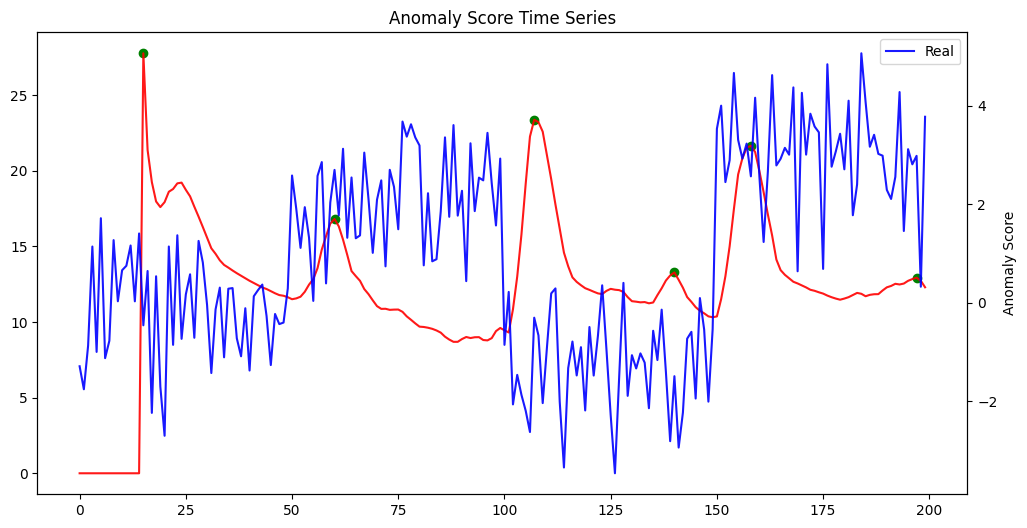

In [19]:

# Apply Changefinder algorithm for anomaly detection
r = 0.065
order = 1
smooth = 10
anomaly_scores = changefinderTS(data_mean, r, order, smooth)

# Determine change points from anomaly scores
change_points = find_change_points(anomaly_scores)
print(change_points)
# Plot the anomaly scores and change points
plotTSScore(data_mean, anomaly_scores, change_points)

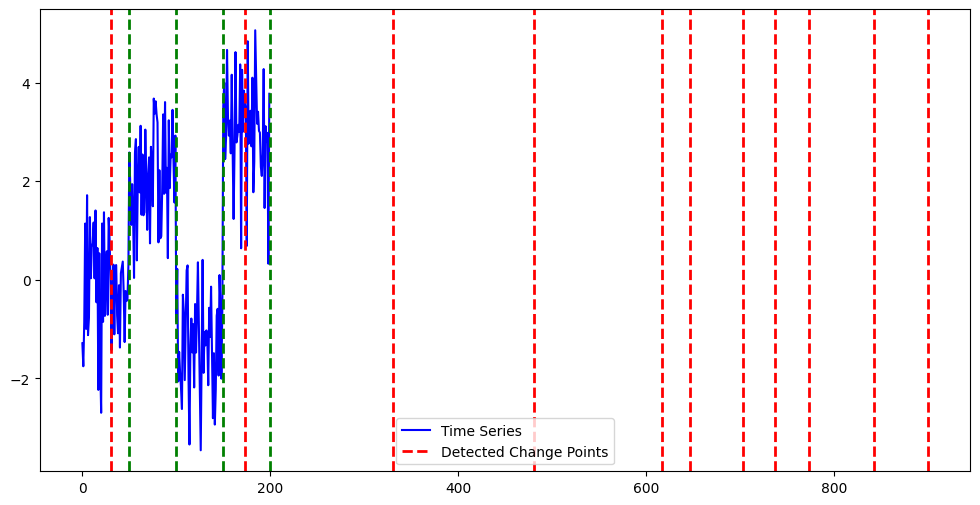

In [24]:
def plot_change_points(ts, ts_change_loc, true_ts=None):
    plt.figure(figsize=(12, 6))
    plt.plot(ts, label='Time Series', color='blue')
    for x in ts_change_loc:
        plt.axvline(x, lw=2, color='red', linestyle='--')
    # Plot vertical lines for detected change points
    if true_ts is not None:
        for x in true_ts:
            plt.axvline(x, lw=2, color='green', linestyle='--')
    
    # Add a legend manually with the desired labels
    plt.legend(['Time Series', 'Detected Change Points'])
    plt.show()
        
plot_change_points(data_mean,change_points, true_ts =true_change_points_mean)

[ 15  46  59  80 112 158]


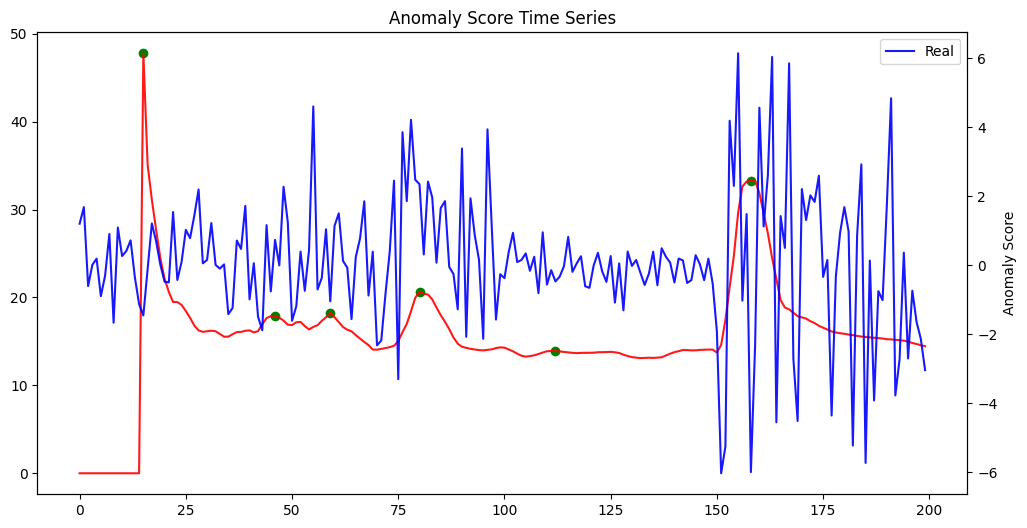

In [25]:
# Apply Changefinder algorithm for anomaly detection
r = 0.03
order = 1
smooth = 10
anomaly_scores = changefinderTS(data_std, r, order, smooth)

# Determine change points from anomaly scores
change_points = find_change_points(anomaly_scores)
print(change_points)
# Plot the anomaly scores and change points
plotTSScore(data_std, anomaly_scores, change_points)

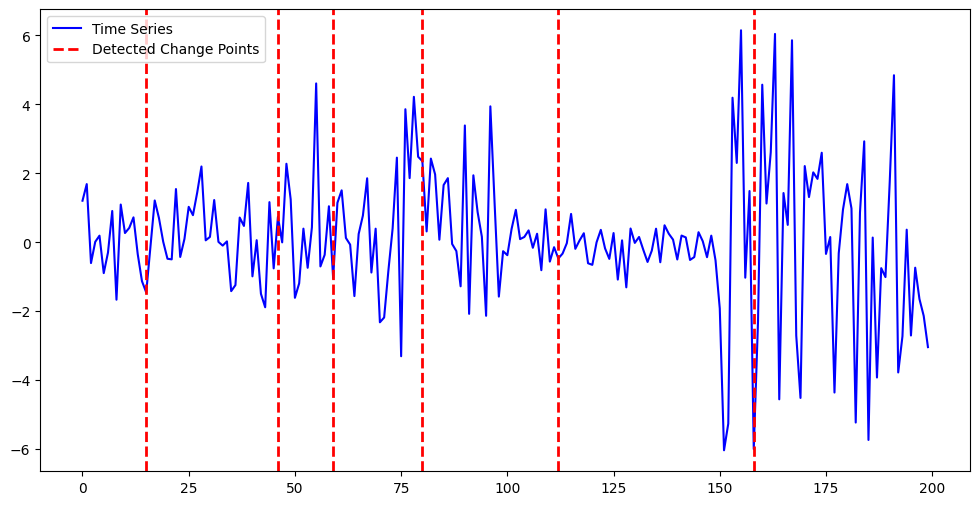

In [26]:
plot_change_points(data_std,change_points)

[ 30 173 331 481 617 647 703 737 773 843 900]


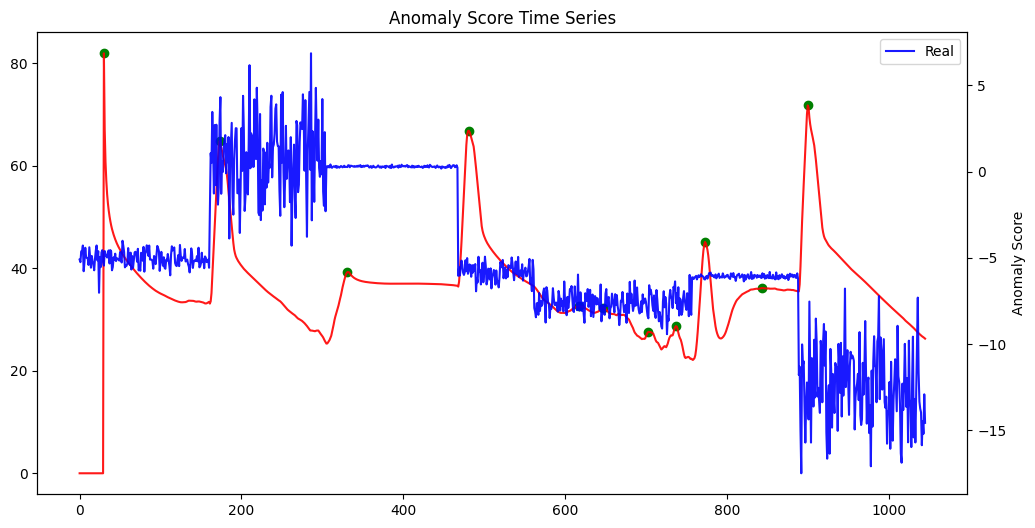

In [27]:
# Apply Changefinder algorithm for anomaly detection
r = 0.03
order = 1
smooth = 20
anomaly_scores = changefinderTS(data, r, order, smooth)

# Determine change points from anomaly scores
change_points = find_change_points(anomaly_scores)
print(change_points)
# Plot the anomaly scores and change points
plotTSScore(data, anomaly_scores, change_points)

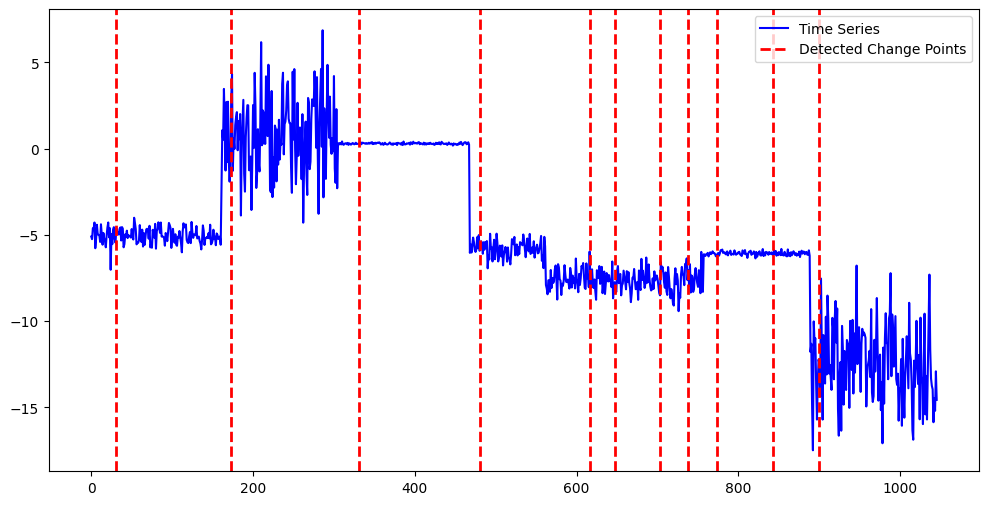

In [28]:
plot_change_points(data,change_points)

### Probabilistic Methods: Bayesian change point detection

https://gregorygundersen.com/blog/2019/08/13/bocd/ 

https://github.com/hildensia/bayesian_changepoint_detection

https://notebook.community/hildensia/bayesian_changepoint_detection/Example%20Code 

In [11]:
import bayesian_changepoint_detection.offline_changepoint_detection as offcd
from functools import partial


Q, P, Pcp = offcd.offline_changepoint_detection(data, partial(offcd.const_prior, l=(len(data)+1)), offcd.gaussian_obs_log_likelihood, truncate=-40)

Use scipy logsumexp().


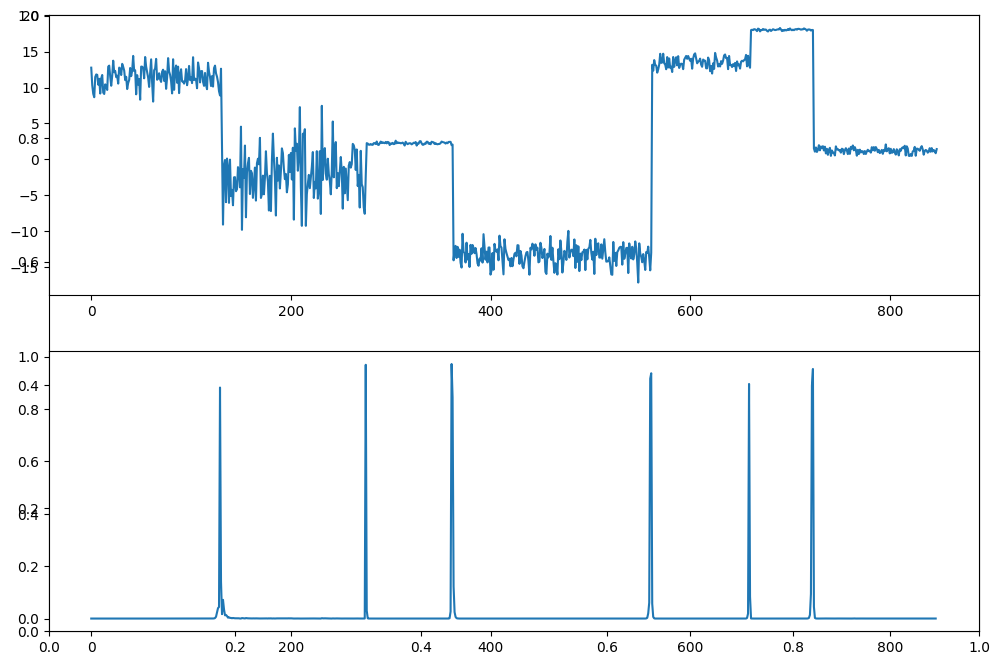

In [20]:
fig, ax = plt.subplots(figsize=[12, 8])
ax = fig.add_subplot(2, 1, 1)
ax.plot(data[:])
ax = fig.add_subplot(2, 1, 2, sharex=ax)
ax.plot(np.exp(Pcp).sum(0))

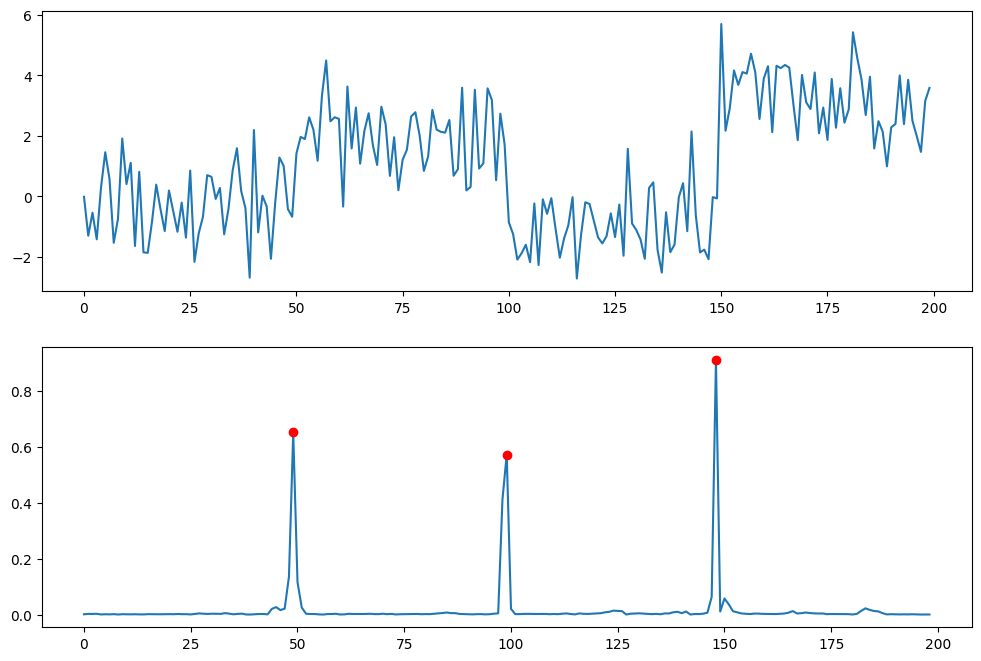

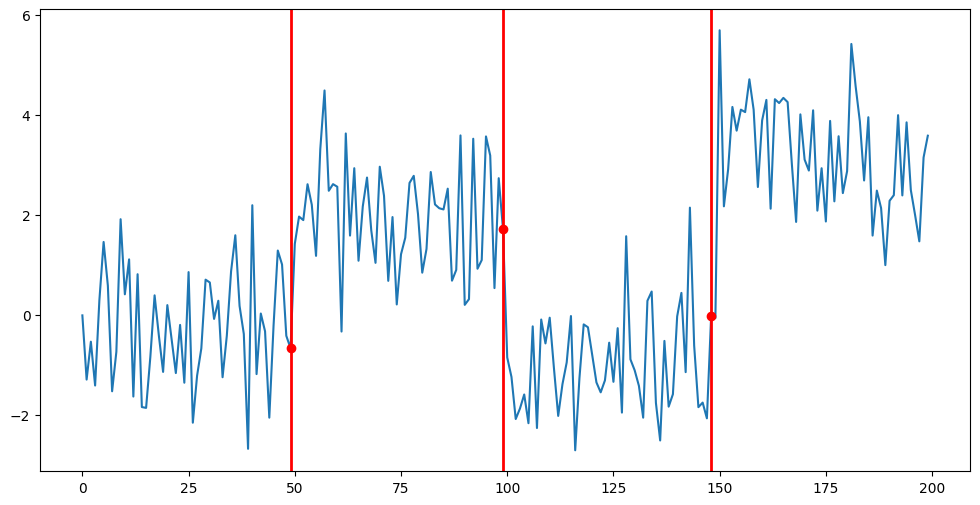

In [32]:
Q, P, Pcp = offcd.offline_changepoint_detection(data_mean, partial(offcd.const_prior, l=(len(data_mean)+1)), offcd.gaussian_obs_log_likelihood, truncate=-40)


# Création de la figure et des sous-graphiques
fig, ax = plt.subplots(2, 1, figsize=[12, 8])
ax[0].plot(data_mean[:])
ax[1].plot(np.exp(Pcp).sum(0))

# Trouver les indices des pics
peak_indices, _ = find_peaks(np.exp(Pcp).sum(0), height=0.2)  # Seulement les pics avec une hauteur > 0.2

# Marquage des pics sur le deuxième plot
ax[1].plot(peak_indices, np.exp(Pcp).sum(0)[peak_indices], 'ro')  # Marquer les pics avec des cercles rouges

# Création d'une autre figure pour tracer les pics sur la série temporelle
fig, ax_ts = plt.subplots(figsize=[12, 6])
ax_ts.plot(data_mean[:])
ax_ts.plot(peak_indices, data_mean[peak_indices], 'ro')  # Marquer les pics sur la série temporelle avec des cercles rouges
for x in peak_indices:
    plt.axvline(x,lw=2, color='red')
plt.show()

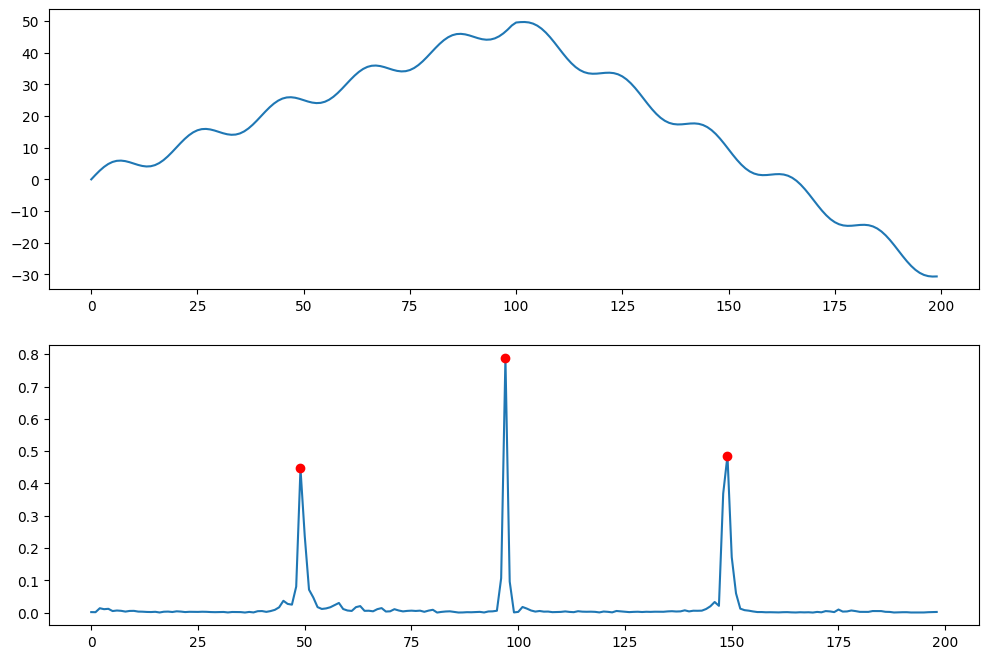

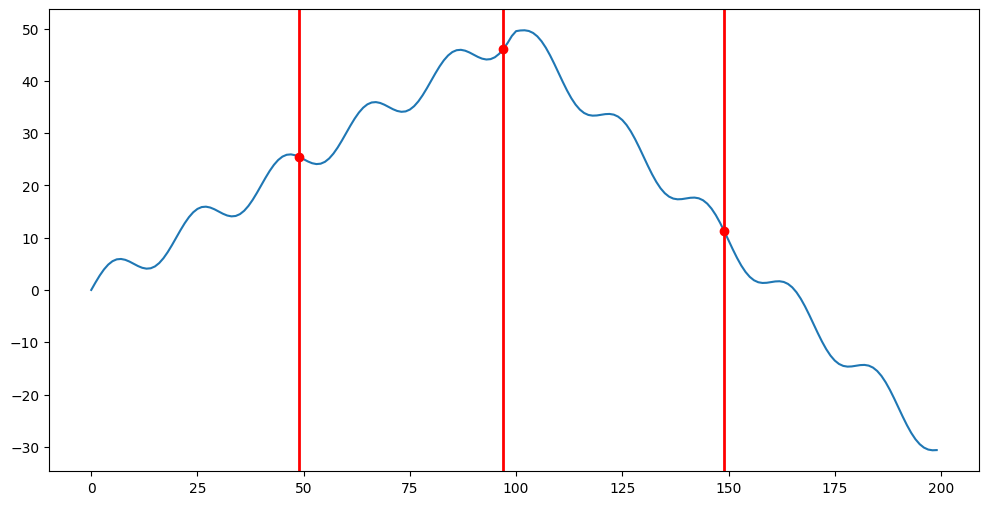

In [12]:
Q, P, Pcp = offcd.offline_changepoint_detection(data_mean, partial(offcd.const_prior, l=(len(data_tr)+1)), offcd.gaussian_obs_log_likelihood, truncate=-40)


# Création de la figure et des sous-graphiques
fig, ax = plt.subplots(2, 1, figsize=[12, 8])
ax[0].plot(data_tr[:])
ax[1].plot(np.exp(Pcp).sum(0))

# Trouver les indices des pics
peak_indices, _ = find_peaks(np.exp(Pcp).sum(0), height=0.2)  # Seulement les pics avec une hauteur > 0.2

# Marquage des pics sur le deuxième plot
ax[1].plot(peak_indices, np.exp(Pcp).sum(0)[peak_indices], 'ro')  # Marquer les pics avec des cercles rouges

# Création d'une autre figure pour tracer les pics sur la série temporelle
fig, ax_ts = plt.subplots(figsize=[12, 6])
ax_ts.plot(data_tr[:])
ax_ts.plot(peak_indices, data_tr[peak_indices], 'ro')  # Marquer les pics sur la série temporelle avec des cercles rouges
for x in peak_indices:
    plt.axvline(x,lw=2, color='red')
plt.show()

In [29]:
import bocd
# Initialize object
bc = bocd.BayesianOnlineChangePointDetection(bocd.ConstantHazard(300), bocd.StudentT(mu=0, kappa=1, alpha=1, beta=1))

# Online estimation and get the maximum likelihood r_t at each time point
rt_mle = np.empty(data.shape)
for i, d in enumerate(data):
    bc.update(d)
    rt_mle[i] = bc.rt 

/tmp/ipykernel_108242/73797933.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rt_mle[i] = bc.rt


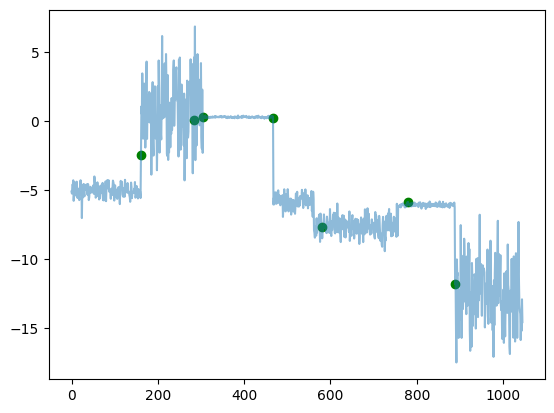

In [30]:


# Plot data with estimated change points
plt.plot(data, alpha=0.5, label="observation")
index_changes = np.where(np.diff(rt_mle)<0)[0]
plt.scatter(index_changes, data[index_changes], c='green', label="change point")



In [31]:
import Rbeast as rb

In [36]:
help(rb)

Help on package Rbeast:

NAME
    Rbeast

DESCRIPTION
    #https://gist.github.com/CMCDragonkai/510ce9456a0429f616baa243d1de3dbf
    #https://stackoverflow.com/questions/14295277/not-exporting-functions-from-python-module

PACKAGE CONTENTS
    Rbeast
    beast
    beast123
    beast_irreg
    cvt_to_numpy
    extractbeast
    load_example
    plotbeast
    printbeast

CLASSES
    builtins.object
        BeastOutputClass
        args
    
    class BeastOutputClass(builtins.object)
     |  Methods defined here:
     |  
     |  __getitem__ = extract(o, index)
     |  
     |  __repr__ = obj_repr(o)
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)
    
    class args(builtins.object)
     |  args(**kwargs)
     |  
     |  Methods define


INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 100
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  1 (unknown unit)
hasSeasonCmpnt: False | no periodic or seasonal component. The model Y=Trend+Error is fitted.
HasOutlierCmpt: False | If true, Y=Trend+Outlier+Error (experimental) is fitted instead of Y=Trend+Error 
Detrend       : False | 

/home/ayoubtgh/.local/lib/python3.10/site-packages/Rbeast/plotbeast.py:294: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


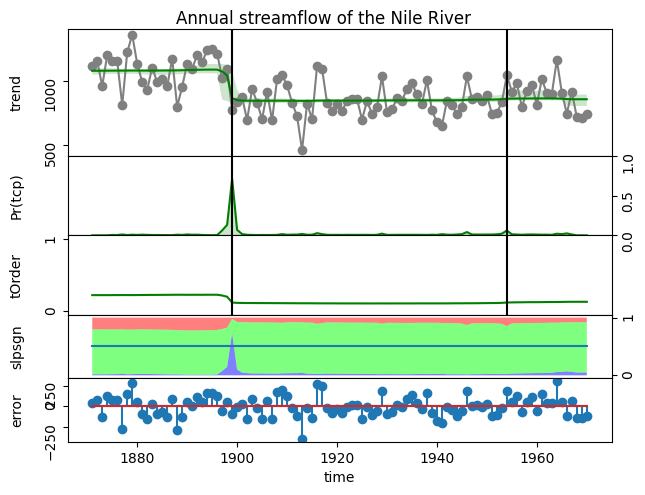

In [32]:
nile, year = rb.load_example('nile')                     # nile is a 1d Python array or numpy vector
o          = rb.beast( nile, start=1871, season='none')  # season='none' bcz the data has no seasonal/periodic component
rb.plot(o, title='Annual streamflow of the Nile River')
rb.print(o)


INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 1046
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  1 (unknown unit)
HasSeasonCmpnt: True  | period = 3 (unknown unit). The model 'Y=Trend+Season+Error' is fitted.
              : Num_of_DataPoints_per_Period = period/deltaTime = 3/1 = 3
HasOutlierCmpt: False | If true, Y=Trend+Season+Outlie

/home/ayoubtgh/.local/lib/python3.10/site-packages/Rbeast/plotbeast.py:294: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


#####################################################################
#                      Seasonal  Changepoints                       #
#####################################################################
.-------------------------------------------------------------------.
| Ascii plot of probability distribution for number of chgpts (ncp) |
.-------------------------------------------------------------------.
|Pr(ncp = 0 )=0.002|*                                               |
|Pr(ncp = 1 )=0.005|*                                               |
|Pr(ncp = 2 )=0.004|*                                               |
|Pr(ncp = 3 )=0.004|*                                               |
|Pr(ncp = 4 )=0.004|*                                               |
|Pr(ncp = 5 )=0.005|*                                               |
|Pr(ncp = 6 )=0.004|*                                               |
|Pr(ncp = 7 )=0.005|*                                               |
|Pr(ncp = 8 )=0.006|

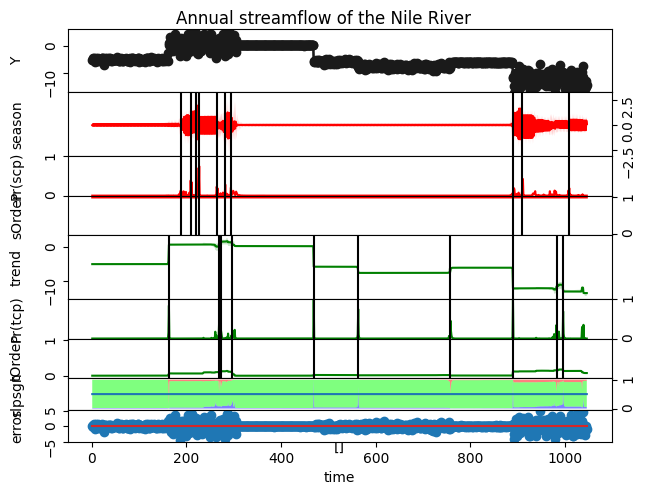

In [33]:
nile, year = rb.load_example('nile')                     # nile is a 1d Python array or numpy vector
o          = rb.beast(data)  # season='none' bcz the data has no seasonal/periodic component
rb.plot(o, title='Annual streamflow of the Nile River')
rb.print(o)

In [52]:
o.trend.cp

array([469., 163., 890., 563., 996., 758., 982., 297., 269., 273.],
      dtype=float32)

In [53]:
import hana_ml
from hana_ml.algorithms.pal.tsa.changepoint import OnlineBCPD
obcpd_with_prune    = OnlineBCPD(threshold=0.5, prune=True)
obcpd_without_prune = OnlineBCPD(threshold=0.5, prune=False)

In [55]:
obcpd = OnlineBCPD(threshold=0.5, prune=True)

## References

https://www.iese.fraunhofer.de/blog/change-point-detection/ 

https://forecastegy.com/posts/change-point-detection-time-series-python/

https://hackmd.io/@j8XMcqD9TZOM6HCJVKlLLg/Hy190_dXL

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5464762/

https://redpoll.ai/blog/changepoint/

https://rdrr.io/cran/Rbeast/man/beast.html



